# Compare Optimized Mini-Neptune Case Presented During Final Talk at NASA w/ New Script

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import copy
import pandas as pd
from scipy import optimize
from matplotlib import pyplot as plt
import pickle
from itertools import cycle
import matplotlib.colors as mcolors
from photochem.utils import stars
import PICASO_Climate_grid_121625 as picaso_grid
import Photochem_grid_121625 as photochem_grid
from picaso.photochem import EquilibriumChemistry

/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/Installation&Setup_Instructions/picasofiles/reference
/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/Installation&Setup_Instructions/picasofiles/grp/redcat/trds


## Load old results of K218b presented during NASA Summer 2025 Internship
- total flux: .915x solar
- metallicity: 0.5x solar
- internal temperature: 155K
- mixing coefficient: 10^5 cm^2/s

In [2]:
with open('K218b_result_dict.pkl', 'rb') as file:
        old_K218b_dictionary = pickle.load(file)
old_K218b_dictionary

{'PT_list_.915_0.5_155_5': [array([1.00000000e-06, 1.25892541e-06, 1.58489319e-06, 1.99526231e-06,
         2.51188643e-06, 3.16227766e-06, 3.98107171e-06, 5.01187234e-06,
         6.30957344e-06, 7.94328235e-06, 1.00000000e-05, 1.25892541e-05,
         1.58489319e-05, 1.99526231e-05, 2.51188643e-05, 3.16227766e-05,
         3.98107171e-05, 5.01187234e-05, 6.30957344e-05, 7.94328235e-05,
         1.00000000e-04, 1.25892541e-04, 1.58489319e-04, 1.99526231e-04,
         2.51188643e-04, 3.16227766e-04, 3.98107171e-04, 5.01187234e-04,
         6.30957344e-04, 7.94328235e-04, 1.00000000e-03, 1.25892541e-03,
         1.58489319e-03, 1.99526231e-03, 2.51188643e-03, 3.16227766e-03,
         3.98107171e-03, 5.01187234e-03, 6.30957344e-03, 7.94328235e-03,
         1.00000000e-02, 1.25892541e-02, 1.58489319e-02, 1.99526231e-02,
         2.51188643e-02, 3.16227766e-02, 3.98107171e-02, 5.01187234e-02,
         6.30957344e-02, 7.94328235e-02, 1.00000000e-01, 1.25892541e-01,
         1.58489319e-01, 

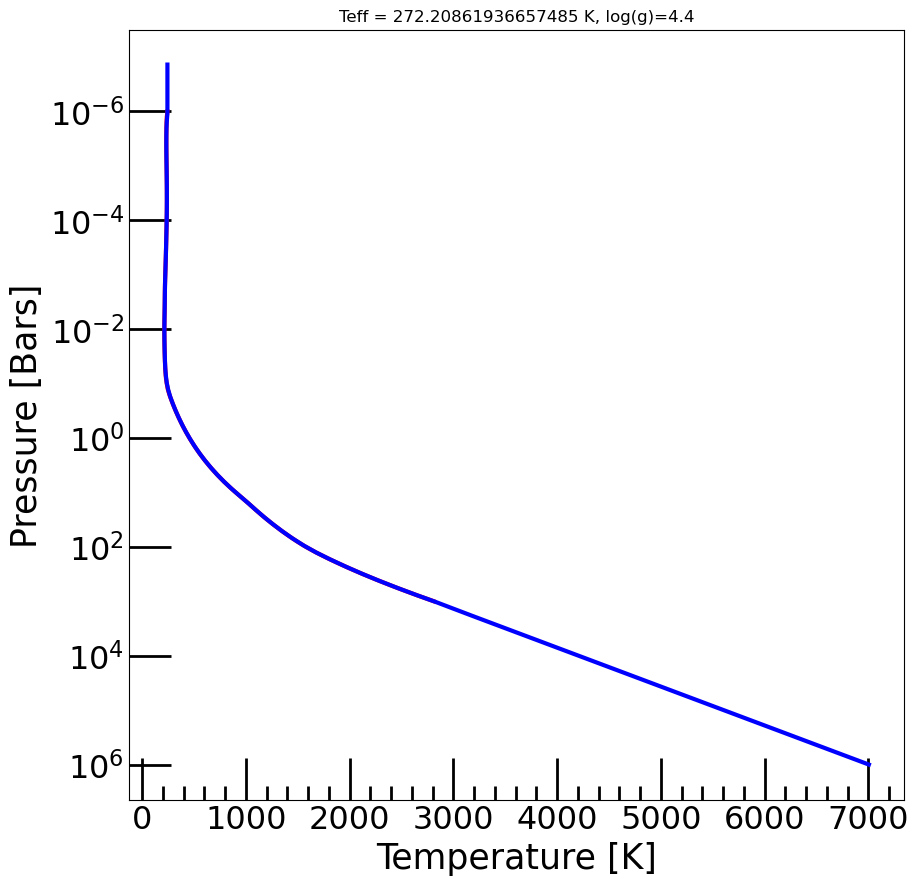

In [3]:
# Plot the PT Profile from PICASO
    
plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.gca().invert_yaxis()
    
plt.semilogy(old_K218b_dictionary['PT_list_.915_0.5_155_5'][1],old_K218b_dictionary['PT_list_.915_0.5_155_5'][0],color="r",linewidth=3, label='PICASO PT')
plt.semilogy(old_K218b_dictionary['PT_list_Photochem'][1],old_K218b_dictionary['PT_list_Photochem'][0]/(10**6),color="blue",linewidth=3, label='PICASO PT')
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

total_flux = .915
Tef = stars.equilibrium_temperature(total_flux*1361, 0)
plt.title(f"Teff = {Tef} K, log(g)=4.4")

plt.show()

In [4]:
old_K218b_dictionary['sol_dict'].keys()

dict_keys(['1CH2_sol', 'C2H2OH_sol', 'C2H2_sol', 'C2H2aer_sol', 'C2H3OH_sol', 'C2H3_sol', 'C2H4OH_sol', 'C2H4_sol', 'C2H4aer_sol', 'C2H5_sol', 'C2H6_sol', 'C2H6aer_sol', 'C2H_sol', 'C2_sol', 'C3H4_sol', 'C3H6_sol', 'C4H2_sol', 'C4H3_sol', 'C4H4_sol', 'C4H_sol', 'CH2CHO_sol', 'CH2CN_sol', 'CH2CO_sol', 'CH2N2_sol', 'CH2_sol', 'CH3CHO_sol', 'CH3CN_sol', 'CH3CNaer_sol', 'CH3CO_sol', 'CH3O2_sol', 'CH3OH_sol', 'CH3O_sol', 'CH3_sol', 'CH4_sol', 'CH4aer_sol', 'CH_sol', 'CN_sol', 'CO2_sol', 'CO2aer_sol', 'CO_sol', 'C_sol', 'H2CN_sol', 'H2COH_sol', 'H2CO_sol', 'H2O2_sol', 'H2O_sol', 'H2Oaer_sol', 'H2_sol', 'HCCCN_sol', 'HCCCNaer_sol', 'HCCO_sol', 'HCNOH_sol', 'HCN_sol', 'HCNaer_sol', 'HCO_sol', 'HNCO_sol', 'HNO2_sol', 'HNO3_sol', 'HNO_sol', 'HO2_sol', 'H_sol', 'He_sol', 'Kzz_sol', 'N2D_sol', 'N2H2_sol', 'N2H3_sol', 'N2H4_sol', 'N2O_sol', 'N2Oaer_sol', 'N2_sol', 'NCO_sol', 'NH2CO_sol', 'NH2_sol', 'NH3_sol', 'NH3aer_sol', 'NH_sol', 'NNH_sol', 'NO2_sol', 'NO3_sol', 'NO_sol', 'N_sol', 'O1D_sol', 'O2

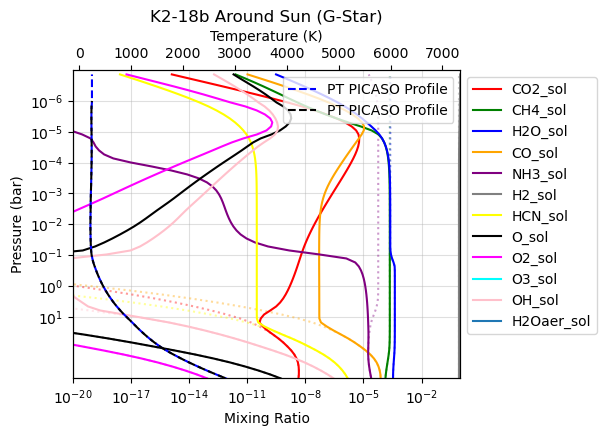

In [5]:
# This is the Photochemical Profile

soleq_dict = old_K218b_dictionary['soleq_dict']
sol_dict = old_K218b_dictionary['sol_dict']
PT_list_Photochem = old_K218b_dictionary['PT_list_Photochem']
PT_list = old_K218b_dictionary['PT_list_.915_0.5_155_5']

# Plot the Composition from Photochem
custom_colors = ['red', 'green', 'blue', 'orange', 'purple', 'grey', 'yellow', 'black', 'magenta', 'cyan', 'pink', '#1f77b4']

fig, ax1 = plt.subplots(1,1,figsize=[5,4])
#species = ['CO2','H2O','CH4','CO','NH3','H2','HCN','H2Oaer']
species_sol = ['CO2_sol','CH4_sol','H2O_sol','CO_sol','NH3_sol','H2_sol','HCN_sol', 'O_sol', 'O2_sol', 'O3_sol', 'OH_sol', 'H2Oaer_sol']
species_soleq = ['CO2_soleq','CH4_soleq','H2O_soleq','CO_soleq','NH3_soleq','H2_soleq','HCN_soleq', 'O_soleq', 'O2_soleq', 'O3_soleq', 'OH_soleq', 'H2Oaer_soleq']
    
#for i,sp in enumerate(species):
#    ax1.plot(sol_dict[sp],sol_dict['pressure']/1e6,label=sp, c='C'+str(i))
#    ax1.plot(soleq_dict[sp],soleq_dict['pressure']/1e6, ls=':', c='C'+str(i), alpha=0.4)

index_soleq = 0
index_sol = 0
for i,sp in enumerate(species_soleq):
    ax1.plot(soleq_dict[sp],soleq_dict['pressure_soleq']/1e6, ls=':', c=custom_colors[index_soleq], alpha=0.4)
    index_soleq += 1
for i,sp in enumerate(species_sol):
    ax1.plot(sol_dict[sp],sol_dict['pressure_sol']/1e6, c=custom_colors[index_sol], label=sp)
    index_sol += 1
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e-20,1)
ax1.set_ylim(1000,1e-7)
ax1.grid(alpha=0.4)
ax1.legend(ncol=1,bbox_to_anchor=(1,1.0),loc='upper left')
ax1.set_xlabel('Mixing Ratio')
ax1.set_ylabel('Pressure (bar)')
ax1.set_yticks(10.0**np.arange(-6,2))
    
ax2 = ax1.twiny()
ax2.set_xlabel('Temperature (K)')

ax2.plot(PT_list_Photochem[1], (PT_list_Photochem[0]/(10**6)), c='blue', ls='--',label='PT PICASO Profile')
ax2.plot(np.flip(PT_list[1]), np.flip(PT_list[0]), c='black', ls='--',label='PT PICASO Profile')
    
plt.title('K2-18b Around Sun (G-Star)')
    
plt.legend()

plt.show()

## Same K218b case, but with new opacities (should be relatively similar)

### Old Inputs:
- total flux: .915x solar
- metallicity: 0.5x (logspace) x solar
- internal temperature: 155K
- mixing coefficient: 10^5 cm^2/s

### New Inputs:
- planet radius: 2.61x Earth 
- metallicity: 0.5x (logspace) x solar
- tint: 155K
- semi major in AU: 1.04 AU
- ctoO_solar: 1x solar c/o ratio

### Also same star specs (assumed sun like star)


## Calculate the PT Profile using new opacities & Grid

In [6]:
def calc_semi_major_SUN(Teq):
    """
    Calculates the semi-major distance from the Sun of a planet whose equilibrium temperature can vary.
    
    Parameters:
    
    Teq: float
        This is the equilibrium temperature (in Kelvin) calculated based on total flux (or otherwise) of the planet.

    Results:
    
    distance_AU: float
        Returns the distance from the planet to the Sun to maintain equilibrium temperature in AU.
    
    """
    luminosity_star = 3.846*(10**26) # in Watts for the Sun
    boltzmann_const = 5.670374419*(10**-8) # in W/m^2 * K^4 for the Sun
    distance_m = np.sqrt(luminosity_star / (16 * np.pi * boltzmann_const * (Teq**4)))
    distance_AU = distance_m / 1.496e+11
    return distance_AU

In [7]:
total_flux = 0.915
Teq = stars.equilibrium_temperature(total_flux*1361, 0) # Note converts total_flux in Earth units to Watts/m^2
semi_major = calc_semi_major_SUN(Teq=Teq) # in AU
print(semi_major)

1.047920906403798


In [8]:
# Manually Run Picaso to test functionality of definition
# out, base_case = picaso_grid.PICASO_PT_Planet(rad_plan=2.61, mh=0.5, tint=155, semi_major_AU=1.04, ctoO=1)

In [9]:
with h5py.File('/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/results/PICASO_climate_updatop_05logm_1co_K218b.h5', 'r') as f:
    print(list(f['inputs']))
    #print(list(f['results']['pressure']))
    pressure = list(f['results']['pressure'])
    temperature = list(f['results']['temperature'])

[array([  2.61,   0.5 , 155.  ,   1.04,   1.  ])]


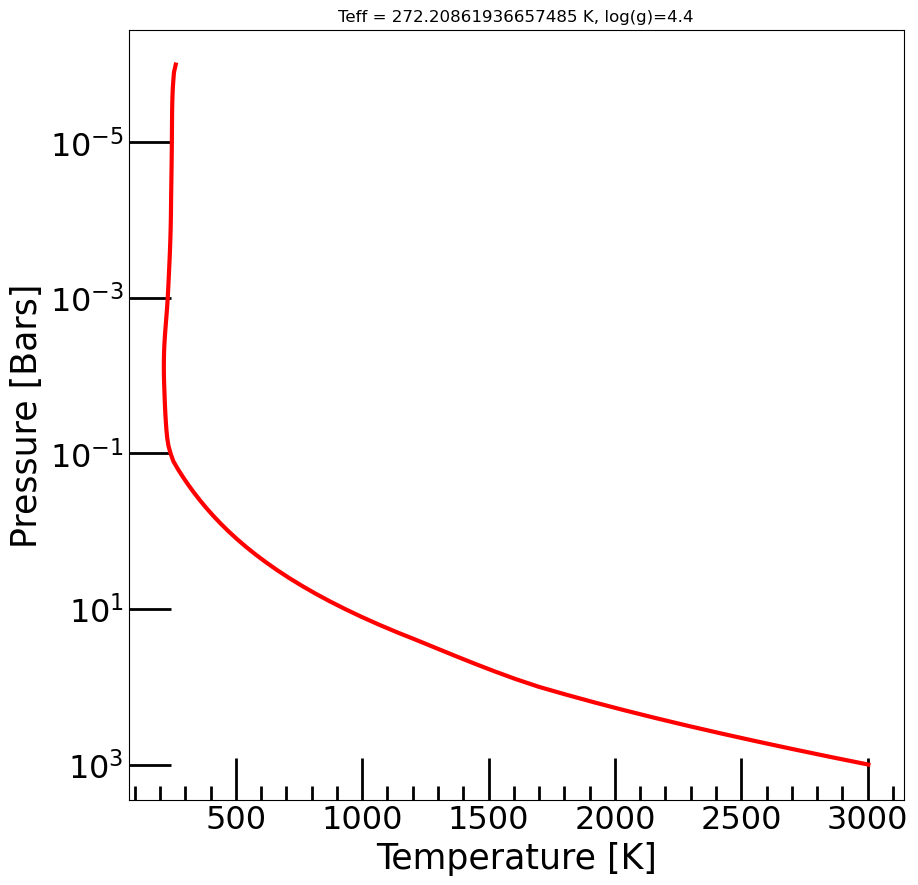

In [10]:
plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.gca().invert_yaxis()
#plt.ylim(500,1e-4)
#plt.xlim(250,1750)

plt.semilogy(temperature[0][0][0][0][0],pressure[0][0][0][0][0],color="r",linewidth=3, label='PICASO PT')
#plt.semilogy(PT_list_Photochem[1],PT_list_Photochem[0]/(10**6),color="blue",linewidth=3, label='PICASO PT')
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

Tef = stars.equilibrium_temperature(total_flux*1361, 0)
plt.title(f"Teff = {Tef} K, log(g)=4.4")

plt.show()

## Calculate the Photochemistry using new opacities and grid

In [11]:
# Note for this to work the gridvals in PICASO_Climate_grid_121625 must match the input values/include the input values.

sol, soleq, pc, convergence_values, convergead = photochem_grid.Photochem_Gas_Giant(rad_plan=2.61, log10_planet_metallicity='0.5', tint=155, semi_major=1.04, ctoO=1, log_Kzz=5, PT_filename='results/PICASO_climate_updatop_05logm_1co_K218b.h5')

The stellar flux file already exists
{'planet_radius': array([2.61]), 'planet_metallicity': array([0.5]), 'tint': array([155]), 'semi_major': array([1.04]), 'ctoO': array([1.])}
[  2.61   0.5  155.     1.04   1.  ]
[array([  2.61,   0.5 , 155.  ,   1.04,   1.  ])]
[array([ True,  True,  True,  True,  True])]
[0.5]
0.5
(array([0]),)
Was able to successfully find your input parameters in the PICASO TP profile grid!
nsteps = 100  longdy = 5.9e-01  max_dT = 1.1e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 200  longdy = 3.4e+00  max_dT = 1.1e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 300  longdy = 3.1e+01  max_dT = 1.1e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 400  longdy = 6.5e+02  max_dT = 1.1e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 500  longdy = 3.4e+03  max_dT = 1.1e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 600  longdy = 6.9e+03  max_dT = 1.1e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2

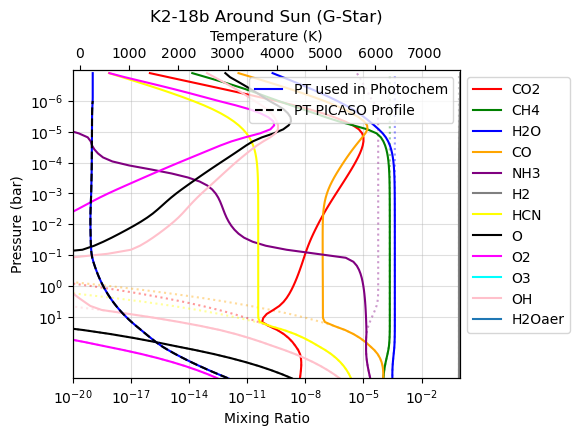

In [12]:
# This is the Photochemical Profile

custom_colors = ['red', 'green', 'blue', 'orange', 'purple', 'grey', 'yellow', 'black', 'magenta', 'cyan', 'pink', '#1f77b4']

# Plot the Composition from Photochem
fig, ax1 = plt.subplots(1,1,figsize=[5,4])
#species = ['CO2','H2O','CH4','CO','NH3','H2','HCN','H2Oaer']
species_sol = ['CO2','CH4','H2O','CO','NH3','H2','HCN', 'O', 'O2', 'O3', 'OH', 'H2Oaer']
species_soleq = ['CO2','CH4','H2O','CO','NH3','H2','HCN', 'O', 'O2', 'O3', 'OH', 'H2Oaer']
    
#for i,sp in enumerate(species):
#    ax1.plot(sol_dict[sp],sol_dict['pressure']/1e6,label=sp, c='C'+str(i))
#    ax1.plot(soleq_dict[sp],soleq_dict['pressure']/1e6, ls=':', c='C'+str(i), alpha=0.4)

index_soleq = 0
index_sol = 0
for i,sp in enumerate(species_soleq):
    ax1.plot(soleq[sp],soleq['pressure']/1e6, ls=':', c=custom_colors[index_soleq], alpha=0.4)
    index_soleq += 1
for i,sp in enumerate(species_sol):
    ax1.plot(sol[sp],sol['pressure']/1e6, c=custom_colors[index_sol], label=sp)
    index_sol += 1
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e-20,1)
ax1.set_ylim(1000,1e-7)
ax1.grid(alpha=0.4)
ax1.legend(ncol=1,bbox_to_anchor=(1,1.0),loc='upper left')
ax1.set_xlabel('Mixing Ratio')
ax1.set_ylabel('Pressure (bar)')
ax1.set_yticks(10.0**np.arange(-6,2))
    
ax2 = ax1.twiny()
ax2.set_xlabel('Temperature (K)')

ax2.plot(sol['temperature'], sol['pressure']/10**6, c='blue', label='PT used in Photochem')
ax2.plot(np.flip(temperature[0][0][0][0][0]), np.flip(pressure[0][0][0][0][0]), c='black', ls='--',label='PT PICASO Profile')
    
plt.title('K2-18b Around Sun (G-Star)')
    
plt.legend()

plt.show()

## Finally compare the TP profiles of the old method vs new method, noting distance to planet and total flux aren't exactly matching

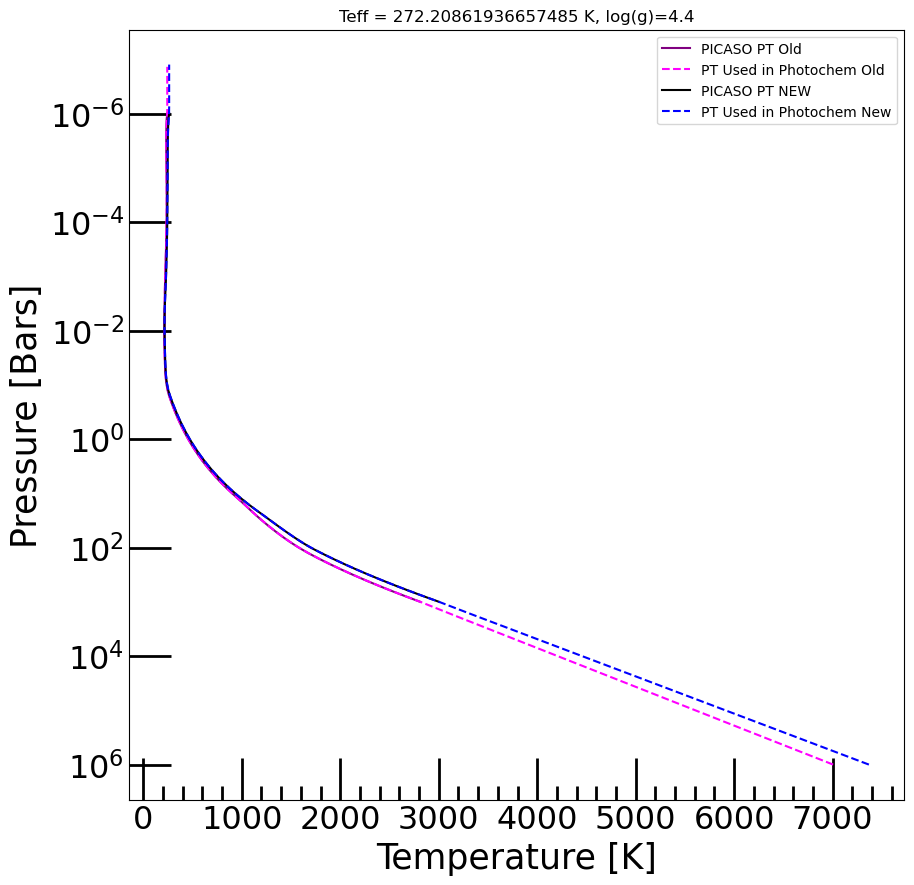

In [13]:
# Plot the PT Profile from PICASO
    
plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.gca().invert_yaxis()
    
plt.semilogy(old_K218b_dictionary['PT_list_.915_0.5_155_5'][1],old_K218b_dictionary['PT_list_.915_0.5_155_5'][0],color="purple", ls='-', label='PICASO PT Old')
plt.semilogy(old_K218b_dictionary['PT_list_Photochem'][1],old_K218b_dictionary['PT_list_Photochem'][0]/(10**6),color="magenta",ls='--', label='PT Used in Photochem Old')

plt.semilogy(temperature[0][0][0][0][0], pressure[0][0][0][0][0],color="black", label='PICASO PT NEW')
plt.semilogy(sol['temperature'], sol['pressure']/10**6,color="blue", ls='--', label='PT Used in Photochem New')

plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

total_flux = .915
Tef = stars.equilibrium_temperature(total_flux*1361, 0)
plt.title(f"Teff = {Tef} K, log(g)=4.4")
plt.legend()

plt.show()

### Attempt 1 at Guessed Parameter Space with Oxygen Rich Atmosphere
We expect this exploration to differ from the prior cases, so make sure to take a look at atmospheric composition in its entirety without limiting as much initially (specific to elements you are looking for and molecules).

Parameters:
- planet radius: 2.61x Earth
- **metallicity: 3.5x (logspace) x solar (~3000x solar metallicity)**
- tint: 155K
- semi major in AU: 1 AU
- **ctoO_solar: 1 x solar c/o ratio**

In [14]:
# Manually Run Picaso to test functionality of definition
# out, base_case = picaso_grid.PICASO_PT_Planet(rad_plan=2.61, log_mh=3.5, tint=155, semi_major_AU=1, ctoO=1, outputfile=3.5)

In [15]:
file_path = "/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/out_3.5.pkl"
with open(file_path, 'rb') as file:
    data = pickle.load(file)
    print(data)

{'pressure': array([1.00000000e-06, 1.25892541e-06, 1.58489319e-06, 1.99526231e-06,
       2.51188643e-06, 3.16227766e-06, 3.98107171e-06, 5.01187234e-06,
       6.30957344e-06, 7.94328235e-06, 1.00000000e-05, 1.25892541e-05,
       1.58489319e-05, 1.99526231e-05, 2.51188643e-05, 3.16227766e-05,
       3.98107171e-05, 5.01187234e-05, 6.30957344e-05, 7.94328235e-05,
       1.00000000e-04, 1.25892541e-04, 1.58489319e-04, 1.99526231e-04,
       2.51188643e-04, 3.16227766e-04, 3.98107171e-04, 5.01187234e-04,
       6.30957344e-04, 7.94328235e-04, 1.00000000e-03, 1.25892541e-03,
       1.58489319e-03, 1.99526231e-03, 2.51188643e-03, 3.16227766e-03,
       3.98107171e-03, 5.01187234e-03, 6.30957344e-03, 7.94328235e-03,
       1.00000000e-02, 1.25892541e-02, 1.58489319e-02, 1.99526231e-02,
       2.51188643e-02, 3.16227766e-02, 3.98107171e-02, 5.01187234e-02,
       6.30957344e-02, 7.94328235e-02, 1.00000000e-01, 1.25892541e-01,
       1.58489319e-01, 1.99526231e-01, 2.51188643e-01, 3.1622776

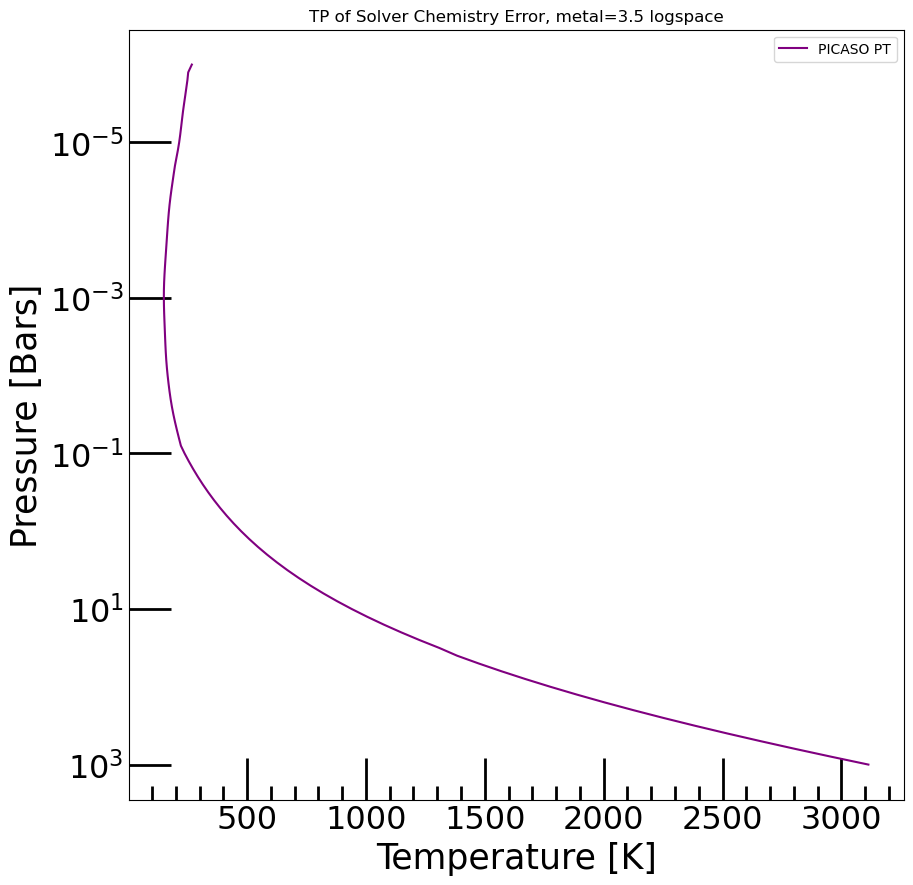

In [16]:
# Plot the PT Profile from PICASO
    
plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.gca().invert_yaxis()
    
plt.semilogy(data['temperature'],data['pressure'],color="purple", ls='-', label='PICASO PT')

plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

total_flux = .915
Tef = stars.equilibrium_temperature(total_flux*1361, 0)
plt.title(f"TP of Solver Chemistry Error, metal=3.5 logspace")
plt.legend()

plt.show()

In [17]:
import os

def Photochem_called(rad_plan=None, log10_planet_metallicity=None, tint=None, semi_major=None, ctoO=None, log_Kzz=None, PIC_PT=None):
    # Planet Parameters
    atoms_names = ['H', 'He', 'N', 'O', 'C'] # We select a subset of the atoms in zahnle_earth.yaml (leave out Cl), remove Sulpher for faster convergence

    # Calculate the Mass of the Planet and Teq
    mass_planet_earth = picaso_grid.mass_from_radius_chen_kipping_2017(R_rearth=rad_plan)
    mass_planet = mass_planet_earth * (5.972e+24) * 1e3 # of planet, but in grams
    radius_planet = rad_plan * (6.371e+6) * 1e2 # of planet but in cm
    solar_zenith_angle = 60 # Used in Tsai et. al. (2023), in degrees
    planet_Teq = picaso_grid.calc_Teq_SUN(distance_AU=semi_major)

    # Dependent constant variables
    if os.path.exists(f'sun_flux_file_{planet_Teq}'):
        stellar_flux_file = f'sun_flux_file_{planet_Teq}'
        print(f"The stellar flux file already exists")
    else:
        wv, F = star_spectrum.solar_spectrum(Teq=planet_Teq, outputfile= f'sun_flux_file_{planet_Teq}')
        stellar_flux_file = f'sun_flux_file_{planet_Teq}'

    pressure = PIC_PT['pressure']
    temperature = PIC_PT['temperature']
    PT_list = np.array([pressure, temperature]) 

    # Test Data - This works fine.
    #with open('out_Sun_5778_initp3bar.pkl', 'rb') as file:
    #    out_reopened = pickle.load(file)
    #    pressure = out_reopened['pressure']
    #    temperature = out_reopened['temperature']
    #PT_list = np.array(pressure), np.array(temperature)
    #convergence_values = np.array([1])

    # Define P-T Profile (convert from PICASO to Photochem)
    P_extended, T_extended = photochem_grid.linear_extrapolate_TP(PT_list[0], PT_list[1]) # Extend the end to bypass BOA Error of mismatching boundary conditions.
    #P = np.flip(np.array(PT_list[0]) * (10**6)).copy()
    #T = np.flip(np.array(PT_list[1])).copy()
    P = np.flip(np.array(P_extended) * (10**6)).copy() # Convert from bars to dynes/cm^2
    T = np.flip(np.array(T_extended)).copy()
    
    # Check if numpy array is sorted (investigating error)
    sorted_P = np.flip(np.sort(P)).copy()
    unsorted_indices = np.where(P != sorted_P)[0]
    
    # Generate reaction & thermodynamic files for gas giants
    photochem_grid.zahnle_rx_and_thermo_files(
    atoms_names=atoms_names,
    rxns_filename='photochem_rxns.yaml',
    thermo_filename='photochem_thermo.yaml',
    remove_reaction_particles=True # For gas giants, we should always leave out reaction particles.
    )

    # Initialize ExoAtmosphereGasGiant
    # Assigns 
    pc = photochem_grid.gasgiants.EvoAtmosphereGasGiant(
        mechanism_file='photochem_rxns.yaml',
        stellar_flux_file=stellar_flux_file,
        planet_mass=mass_planet,
        planet_radius=radius_planet,
        solar_zenith_angle=solar_zenith_angle,
        thermo_file='photochem_thermo.yaml'
    )
    # Adjust convergence parameters:
    pc.var.conv_longdy = 0.03 # converges at 3% (change of mixing ratios over long time)
    pc.gdat.max_total_step = 10000 # assumes convergence after 10,000 steps
    
    pc.gdat.verbose = True # printing
    
    # Define the host star composition
    molfracs_atoms_sun = np.ones(len(pc.gdat.gas.atoms_names))*1e-10 # This is for the Sun
    comp = {
        'H' : 9.21e-01,
        'N' : 6.23e-05,
        'O' : 4.51e-04,
        'C' : 2.48e-04,
        'S' : 1.21e-05,
        'He' : 7.84e-02
    }

    tot = sum(comp.values())
    for key in comp:
        comp[key] /= tot
    for i,atom in enumerate(pc.gdat.gas.atoms_names):
        molfracs_atoms_sun[i] = comp[atom]
    
    pc.gdat.gas.molfracs_atoms_sun = molfracs_atoms_sun

    # Assume a default radius for particles 1e-5cm was default, so we increased the size but think of these in microns
    particle_radius = pc.var.particle_radius
    particle_radius[:,:] = 1e-3 #cm or 10 microns
    pc.var.particle_radius = particle_radius

    # Assumed Kzz (cm^2/s) in Tsai et al. (2023)
    Kzz_zero_grid = np.ones(P.shape[0])
    Kzz = Kzz_zero_grid*(10**log_Kzz) #Note Kzz_fac was meant to be the power of 10 since we are in log10 space

    # Initialize the PT based on chemical equilibrium 
    pc.gdat.BOA_pressure_factor = 3
    pc.initialize_to_climate_equilibrium_PT(P, T, Kzz, float(log10_planet_metallicity), ctoO)
    
    # Integrate to steady state
    converged = pc.find_steady_state()

    # Check if the model converged after 10,000 steps
    if not converged:
        assert pc.gdat.total_step_counter > pc.gdat.max_total_step - 10
        
    sol_raw = pc.return_atmosphere()
    soleq_raw = pc.return_atmosphere(equilibrium=True)

    # Call the interpolation of the grid 
    sol = photochem_grid.interpolate_photochem_result_to_nlayers(out=sol_raw, nlayers=100)
    soleq = photochem_grid.interpolate_photochem_result_to_nlayers(out=soleq_raw, nlayers=100)
    #convergence_values = np.array([convergence_values[0] for _ in range(len(sol['pressure']))])
    #converged = np.array([converged for _ in range(len(sol['pressure']))])

    # Print out the lengths of arrays: Save the size of the grid for future reference.

    print(f"This is for the input value of planet radius:{rad_plan}, metal:{float(log10_planet_metallicity)}, tint:{tint}, semi major:{semi_major}, ctoO: {ctoO}, log_Kzz: {log_Kzz}")
    
    #for key, value in sol.items():
    #    if isinstance(value, np.ndarray):  # Check if the value is a list (or array)
    #        print(f"The array for sol's '{key}' has a length of: {len(value)}")
    #    else:
    #        print(f"The value for sol's '{key}' is not an array.")

    #for key, value in soleq.items():
    #    if isinstance(value, np.ndarray):  # Check if the value is a list (or array)
    #        print(f"The array for soleq's '{key}' has a length of: {len(value)}, Length of pressure: {len(P)}")
    #    else:
    #        print(f"The value for soleq's '{key}' is not an array.")

    # Add nan's to fit the grid if underestimated, and make sure list goes from largest to smallest.
    

    return sol, soleq, pc

In [18]:
rad_plan = 2.61
log10_metal = '3.5'
tint = 155
semi_major = 1
ctoO = 1
Kzz = 5

sol_3000m_1co, soleq_3000m_1co, pc_3000m_1co = Photochem_called(rad_plan=rad_plan, log10_planet_metallicity=log10_metal, tint=tint, semi_major=semi_major, ctoO=ctoO, log_Kzz=Kzz, PIC_PT=data)

The stellar flux file already exists
nsteps = 100  longdy = 4.6e-01  max_dT = 1.3e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 200  longdy = 9.6e-01  max_dT = 1.3e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 300  longdy = 3.8e+00  max_dT = 1.3e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 400  longdy = 2.0e+03  max_dT = 1.3e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 500  longdy = 1.9e+04  max_dT = 1.3e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 600  longdy = 6.2e+04  max_dT = 1.3e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 700  longdy = 3.2e+03  max_dT = 1.3e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 800  longdy = 4.5e+03  max_dT = 1.3e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 900  longdy = 3.8e+03  max_dT = 1.3e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.2e-07
nsteps = 1000  longdy = 1.1e+05  max_dT = 1.3e+00  max_dlog10edd = 0.0e+00  TOA_p

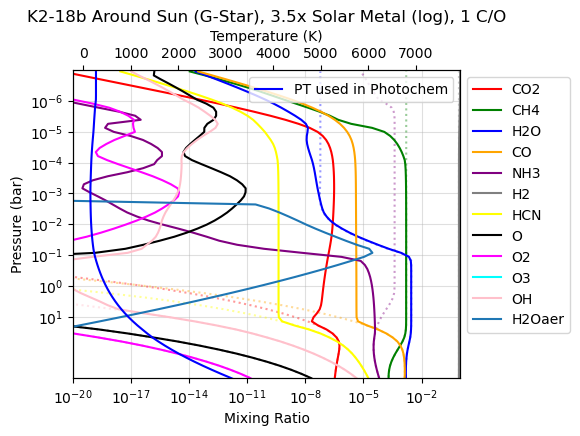

In [19]:
# This is the Photochemical Profile

custom_colors = ['red', 'green', 'blue', 'orange', 'purple', 'grey', 'yellow', 'black', 'magenta', 'cyan', 'pink', '#1f77b4']

# Plot the Composition from Photochem
fig, ax1 = plt.subplots(1,1,figsize=[5,4])
#species = ['CO2','H2O','CH4','CO','NH3','H2','HCN','H2Oaer']

species_sol = ['CO2','CH4','H2O','CO','NH3','H2','HCN', 'O', 'O2', 'O3', 'OH', 'H2Oaer']
species_soleq = ['CO2','CH4','H2O','CO','NH3','H2','HCN', 'O', 'O2', 'O3', 'OH', 'H2Oaer']
    
#for i,sp in enumerate(species):
#    ax1.plot(sol_dict[sp],sol_dict['pressure']/1e6,label=sp, c='C'+str(i))
#    ax1.plot(soleq_dict[sp],soleq_dict['pressure']/1e6, ls=':', c='C'+str(i), alpha=0.4)

index_soleq = 0
index_sol = 0

for i,sp in enumerate(species_soleq):
    ax1.plot(soleq_3000m_1co[sp],soleq_3000m_1co['pressure']/1e6, ls=':', c=custom_colors[index_soleq], alpha=0.4)
    index_soleq += 1
for i,sp in enumerate(species_sol):
    ax1.plot(sol_3000m_1co[sp],sol_3000m_1co['pressure']/1e6, c=custom_colors[index_sol], label=sp)
    index_sol +=1
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e-20,1)
ax1.set_ylim(1000,1e-7)
ax1.grid(alpha=0.4)
ax1.legend(ncol=1,bbox_to_anchor=(1,1.0),loc='upper left')
ax1.set_xlabel('Mixing Ratio')
ax1.set_ylabel('Pressure (bar)')
ax1.set_yticks(10.0**np.arange(-6,2))
    
ax2 = ax1.twiny()
ax2.set_xlabel('Temperature (K)')

ax2.plot(sol_3000m_1co['temperature'], sol_3000m_1co['pressure']/10**6, c='blue', label='PT used in Photochem')
#ax2.plot(np.flip(temperature_3000metal_1co[0][0][0][0][0]), np.flip(pressure_3000metal_1co[0][0][0][0][0]), c='black', ls='--',label='PT PICASO Profile')
    
plt.title('K2-18b Around Sun (G-Star), 3.5x Solar Metal (log), 1 C/O')
    
plt.legend()

plt.show()

### Attempt 2 at Guessed Parameter Space with Oxygen Rich Atmosphere
We expect this exploration to differ from the prior cases, so make sure to take a look at atmospheric composition in its entirety without limiting as much initially (specific to elements you are looking for and molecules).

Parameters:
- planet radius: 2.61x Earth
- **metallicity: 3.5x (logspace) x solar (~3000x solar metallicity)**
- tint: 155K
- semi major in AU: 1 AU
- **ctoO_solar: 0.01 x solar c/o ratio**

In [20]:
# Manually Run Picaso to test functionality of definition
# out_001ctoO, base_case_001ctoO = picaso_grid.PICASO_PT_Planet(rad_plan=2.61, log_mh=3.5, tint=155, semi_major_AU=1, ctoO=0.01, outputfile='3.5m_0.01co')

In [21]:
file_path = "/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/out_3.5m_0.01co.pkl"
with open(file_path, 'rb') as file:
    data_35m_001co = pickle.load(file)
    print(data_35m_001co)

{'pressure': array([1.00000000e-06, 1.25892541e-06, 1.58489319e-06, 1.99526231e-06,
       2.51188643e-06, 3.16227766e-06, 3.98107171e-06, 5.01187234e-06,
       6.30957344e-06, 7.94328235e-06, 1.00000000e-05, 1.25892541e-05,
       1.58489319e-05, 1.99526231e-05, 2.51188643e-05, 3.16227766e-05,
       3.98107171e-05, 5.01187234e-05, 6.30957344e-05, 7.94328235e-05,
       1.00000000e-04, 1.25892541e-04, 1.58489319e-04, 1.99526231e-04,
       2.51188643e-04, 3.16227766e-04, 3.98107171e-04, 5.01187234e-04,
       6.30957344e-04, 7.94328235e-04, 1.00000000e-03, 1.25892541e-03,
       1.58489319e-03, 1.99526231e-03, 2.51188643e-03, 3.16227766e-03,
       3.98107171e-03, 5.01187234e-03, 6.30957344e-03, 7.94328235e-03,
       1.00000000e-02, 1.25892541e-02, 1.58489319e-02, 1.99526231e-02,
       2.51188643e-02, 3.16227766e-02, 3.98107171e-02, 5.01187234e-02,
       6.30957344e-02, 7.94328235e-02, 1.00000000e-01, 1.25892541e-01,
       1.58489319e-01, 1.99526231e-01, 2.51188643e-01, 3.1622776

In [22]:
rad_plan = 2.61
log10_metal = '3.5'
tint = 155
semi_major = 1
ctoO = 0.01
Kzz = 5

sol_3000m_001co, soleq_3000m_001co, pc_3000m_001co = Photochem_called(rad_plan=rad_plan, log10_planet_metallicity=log10_metal, tint=tint, semi_major=semi_major, ctoO=ctoO, log_Kzz=Kzz, PIC_PT=data_35m_001co)

The stellar flux file already exists
nsteps = 100  longdy = 7.5e-01  max_dT = 1.7e+01  max_dlog10edd = 0.0e+00  TOA_pressure = 1.8e-07
nsteps = 200  longdy = 1.1e+00  max_dT = 1.7e+01  max_dlog10edd = 0.0e+00  TOA_pressure = 1.8e-07
nsteps = 300  longdy = 2.8e+00  max_dT = 1.7e+01  max_dlog10edd = 0.0e+00  TOA_pressure = 1.8e-07
nsteps = 400  longdy = 1.4e+03  max_dT = 1.8e+01  max_dlog10edd = 0.0e+00  TOA_pressure = 1.9e-07
nsteps = 500  longdy = 9.0e+04  max_dT = 1.8e+01  max_dlog10edd = 0.0e+00  TOA_pressure = 1.9e-07
nsteps = 600  longdy = 2.1e+03  max_dT = 1.8e+01  max_dlog10edd = 0.0e+00  TOA_pressure = 1.9e-07
nsteps = 700  longdy = 4.7e+03  max_dT = 1.8e+01  max_dlog10edd = 0.0e+00  TOA_pressure = 1.9e-07
nsteps = 800  longdy = 6.0e+03  max_dT = 1.8e+01  max_dlog10edd = 0.0e+00  TOA_pressure = 1.9e-07
nsteps = 900  longdy = 3.1e+04  max_dT = 1.8e+01  max_dlog10edd = 0.0e+00  TOA_pressure = 1.9e-07
nsteps = 1000  longdy = 6.1e+04  max_dT = 1.8e+01  max_dlog10edd = 0.0e+00  TOA_p

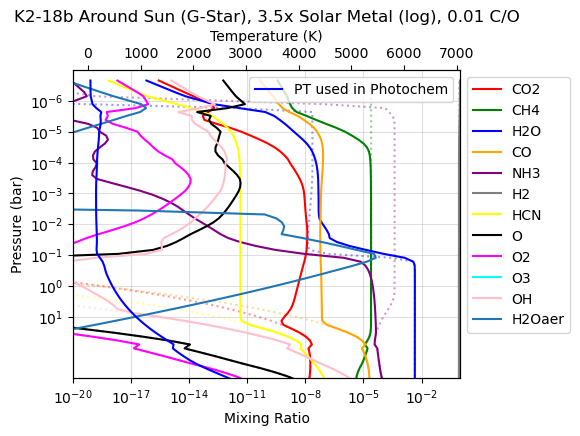

In [23]:
# This is the Photochemical Profile

custom_colors = ['red', 'green', 'blue', 'orange', 'purple', 'grey', 'yellow', 'black', 'magenta', 'cyan', 'pink', '#1f77b4']

# Plot the Composition from Photochem
fig, ax1 = plt.subplots(1,1,figsize=[5,4])
#species = ['CO2','H2O','CH4','CO','NH3','H2','HCN','H2Oaer']

species_sol = ['CO2','CH4','H2O','CO','NH3','H2','HCN', 'O', 'O2', 'O3', 'OH', 'H2Oaer']
species_soleq = ['CO2','CH4','H2O','CO','NH3','H2','HCN', 'O', 'O2', 'O3', 'OH', 'H2Oaer']
    
#for i,sp in enumerate(species):
#    ax1.plot(sol_dict[sp],sol_dict['pressure']/1e6,label=sp, c='C'+str(i))
#    ax1.plot(soleq_dict[sp],soleq_dict['pressure']/1e6, ls=':', c='C'+str(i), alpha=0.4)

index_soleq = 0
index_sol = 0

for i,sp in enumerate(species_soleq):
    ax1.plot(soleq_3000m_001co[sp],soleq_3000m_001co['pressure']/1e6, ls=':', c=custom_colors[index_soleq], alpha=0.4)
    index_soleq += 1
for i,sp in enumerate(species_sol):
    ax1.plot(sol_3000m_001co[sp],sol_3000m_001co['pressure']/1e6, c=custom_colors[index_sol], label=sp)
    index_sol +=1
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e-20,1)
ax1.set_ylim(1000,1e-7)
ax1.grid(alpha=0.4)
ax1.legend(ncol=1,bbox_to_anchor=(1,1.0),loc='upper left')
ax1.set_xlabel('Mixing Ratio')
ax1.set_ylabel('Pressure (bar)')
ax1.set_yticks(10.0**np.arange(-6,2))
    
ax2 = ax1.twiny()
ax2.set_xlabel('Temperature (K)')

ax2.plot(sol_3000m_001co['temperature'], sol_3000m_001co['pressure']/10**6, c='blue', label='PT used in Photochem')
#ax2.plot(np.flip(temperature_3000metal_1co[0][0][0][0][0]), np.flip(pressure_3000metal_1co[0][0][0][0][0]), c='black', ls='--',label='PT PICASO Profile')
    
plt.title('K2-18b Around Sun (G-Star), 3.5x Solar Metal (log), 0.01 C/O')
    
plt.legend()

plt.show()